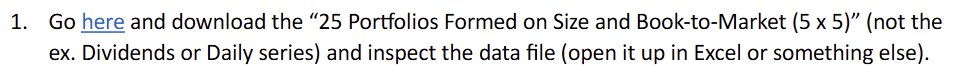

In [612]:
import pandas as pd

df = pd.read_csv("25_Portfolios_5x5.csv")

In [613]:
df

,Unnamed: 0,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
0,192607,5.8275,-1.7005,0.5118,-2.1477,1.9583,1.2117,2.4106,0.6056,-2.6081,...,1.5376,1.5459,1.3389,0.2765,2.4678,3.3248,6.0908,2.0285,3.1263,0.5623
1,192608,-2.0205,-8.0282,1.3968,2.1482,8.5104,2.3619,-0.7525,3.8984,0.2298,...,1.3857,3.8587,1.9738,2.1335,5.3422,1.0169,4.1975,1.9769,5.4923,7.7576
2,192609,-4.829,-2.6805,-4.3417,-3.2683,0.8585,-2.6848,-0.5252,1.0789,-3.2877,...,1.6897,-0.5245,-1.7723,1.4806,0.873,-1.295,3.661,0.1383,-0.7496,-2.4284
3,192610,-9.3633,-3.5519,-3.5024,3.4413,-2.5451,-2.8013,-4.419,-5.0767,-8.027,...,-3.9136,-2.6527,-2.1058,-3.2531,-5.3524,-2.7381,-3.006,-2.2467,-4.6725,-5.8128
4,192611,5.5888,4.1876,2.4384,-4.4495,0.5109,3.1022,-1.7316,3.0424,4.9538,...,3.4491,2.3823,3.7314,5.1102,1.8212,4.433,2.5355,1.528,3.6595,2.5636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8859,202504,0.0365,0.0579,0.0091,0.0424,0.0021,0.1611,0.1008,0.0645,0.0565,...,0.0762,0.0394,0.0507,0.1186,0.0336,0.0728,0.0697,0.0562,0.0673,0.034
8860,202505,0.0374,0.0688,0.0127,0.0374,0.0024,0.1646,0.1084,0.0695,0.059,...,0.0766,0.0393,0.0511,0.1279,0.0312,0.0751,0.0711,0.0567,0.0685,0.034
8861,202506,0.0539,0.0703,0.0161,0.04,-0.0022,0.1653,0.1107,0.0664,0.0614,...,0.0745,0.0388,0.0511,0.1255,0.0311,0.0743,0.073,0.0551,0.0664,0.034
8862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataset description (concise):
### Monthly 5×5 double-sorted equity portfolios built on size and book-to-market. Stocks are first sorted each month into ME1–ME5 (market-cap quintiles; ME1 = smallest, ME5 = largest). Within each size bucket, stocks are independently sorted into BE/BM1–BM5 (book-to-market quintiles; 1 = lowest B/M, 5 = highest). The intersection yields 25 portfolios per month, for which the file reports portfolio returns (value-weighted unless otherwise stated) and, in some panels, counts and characteristics (e.g., average B/M, market cap).

## Issues noticed:
### Column names are inconsistent (e.g., ME vs SizeQ vs me_1; BE vs BM), casing varies, and some fields are ambiguously labeled (e.g., “BE1–5” without stating it’s book-to-market). Multiple datasets/panels (returns, characteristics, and possibly breakpoints) are embedded in a single file without clear tags, causing duplicate or conflicting headers. Dates appear in mixed formats and portfolio cells are not always present for all 25 ME×BM combinations each month. Weighting conventions (value-weighted vs equal-weighted) are not stated, and units/currencies for market cap are unclear.

In [614]:
# Renaming the coloumn name
# ME1 is small market cap and BE1-5 is the bifercation of each Market cap.
# ME1 - ME5 (Market cap of 25 protfolios each month divided into quintiles)

new_columns = [
    "Date", 
    "ME1_BM1", "ME1_BM2", "ME1_BM3", "ME1_BM4", "ME1_BM5", 
    "ME2_BM1", "ME2_BM2", "ME2_BM3", "ME2_BM4", "ME2_BM5",
    "ME3_BM1", "ME3_BM2", "ME3_BM3", "ME3_BM4", "ME3_BM5",
    "ME4_BM1", "ME4_BM2", "ME4_BM3", "ME4_BM4", "ME4_BM5",
    "ME5_BM1", "ME5_BM2", "ME5_BM3", "ME5_BM4", "ME5_BM5"
]

# Assign to the dataframe
df.columns = new_columns

In [615]:
df

,Date,ME1_BM1,ME1_BM2,ME1_BM3,ME1_BM4,ME1_BM5,ME2_BM1,ME2_BM2,ME2_BM3,ME2_BM4,...,ME4_BM1,ME4_BM2,ME4_BM3,ME4_BM4,ME4_BM5,ME5_BM1,ME5_BM2,ME5_BM3,ME5_BM4,ME5_BM5
0,192607,5.8275,-1.7005,0.5118,-2.1477,1.9583,1.2117,2.4106,0.6056,-2.6081,...,1.5376,1.5459,1.3389,0.2765,2.4678,3.3248,6.0908,2.0285,3.1263,0.5623
1,192608,-2.0205,-8.0282,1.3968,2.1482,8.5104,2.3619,-0.7525,3.8984,0.2298,...,1.3857,3.8587,1.9738,2.1335,5.3422,1.0169,4.1975,1.9769,5.4923,7.7576
2,192609,-4.829,-2.6805,-4.3417,-3.2683,0.8585,-2.6848,-0.5252,1.0789,-3.2877,...,1.6897,-0.5245,-1.7723,1.4806,0.873,-1.295,3.661,0.1383,-0.7496,-2.4284
3,192610,-9.3633,-3.5519,-3.5024,3.4413,-2.5451,-2.8013,-4.419,-5.0767,-8.027,...,-3.9136,-2.6527,-2.1058,-3.2531,-5.3524,-2.7381,-3.006,-2.2467,-4.6725,-5.8128
4,192611,5.5888,4.1876,2.4384,-4.4495,0.5109,3.1022,-1.7316,3.0424,4.9538,...,3.4491,2.3823,3.7314,5.1102,1.8212,4.433,2.5355,1.528,3.6595,2.5636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8859,202504,0.0365,0.0579,0.0091,0.0424,0.0021,0.1611,0.1008,0.0645,0.0565,...,0.0762,0.0394,0.0507,0.1186,0.0336,0.0728,0.0697,0.0562,0.0673,0.034
8860,202505,0.0374,0.0688,0.0127,0.0374,0.0024,0.1646,0.1084,0.0695,0.059,...,0.0766,0.0393,0.0511,0.1279,0.0312,0.0751,0.0711,0.0567,0.0685,0.034
8861,202506,0.0539,0.0703,0.0161,0.04,-0.0022,0.1653,0.1107,0.0664,0.0614,...,0.0745,0.0388,0.0511,0.1255,0.0311,0.0743,0.073,0.0551,0.0664,0.034
8862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [616]:
# This is the first “Average Value Weighted Returns – Monthly” -- We have to drop everything bellow it.
# I have hardcoded to take out the first “Average Value Weighted Returns – Monthly”

df = df.loc[:1187]
display(df)

,Date,ME1_BM1,ME1_BM2,ME1_BM3,ME1_BM4,ME1_BM5,ME2_BM1,ME2_BM2,ME2_BM3,ME2_BM4,...,ME4_BM1,ME4_BM2,ME4_BM3,ME4_BM4,ME4_BM5,ME5_BM1,ME5_BM2,ME5_BM3,ME5_BM4,ME5_BM5
0,192607,5.8275,-1.7005,0.5118,-2.1477,1.9583,1.2117,2.4106,0.6056,-2.6081,...,1.5376,1.5459,1.3389,0.2765,2.4678,3.3248,6.0908,2.0285,3.1263,0.5623
1,192608,-2.0205,-8.0282,1.3968,2.1482,8.5104,2.3619,-0.7525,3.8984,0.2298,...,1.3857,3.8587,1.9738,2.1335,5.3422,1.0169,4.1975,1.9769,5.4923,7.7576
2,192609,-4.829,-2.6805,-4.3417,-3.2683,0.8585,-2.6848,-0.5252,1.0789,-3.2877,...,1.6897,-0.5245,-1.7723,1.4806,0.873,-1.295,3.661,0.1383,-0.7496,-2.4284
3,192610,-9.3633,-3.5519,-3.5024,3.4413,-2.5451,-2.8013,-4.419,-5.0767,-8.027,...,-3.9136,-2.6527,-2.1058,-3.2531,-5.3524,-2.7381,-3.006,-2.2467,-4.6725,-5.8128
4,192611,5.5888,4.1876,2.4384,-4.4495,0.5109,3.1022,-1.7316,3.0424,4.9538,...,3.4491,2.3823,3.7314,5.1102,1.8212,4.433,2.5355,1.528,3.6595,2.5636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,202502,-7.0665,-5.9742,-6.5071,-6.0932,-2.3476,-8.2831,-8.8282,-8.3279,-5.6293,...,-4.2825,-6.7574,-2.2267,-2.8109,-1.7042,-3.1108,-1.8839,2.5459,2.8662,1.5498
1184,202503,-13.9313,-12.1005,-9.4072,-9.7306,-6.6402,-8.357,-6.9955,-8.2487,-6.0899,...,-6.6421,-5.8203,-3.2662,-6.433,-1.7756,-7.6632,-4.998,-0.1605,-2.1792,-6.3793
1185,202504,0.8067,1.6903,0.8943,-0.5912,-2.525,0.5968,-0.9047,-2.4543,-3.1368,...,-0.8765,-1.2698,-2.0145,-3.9275,-7.2668,1.4105,-3.0129,-7.3866,-1.3472,-2.7941
1186,202505,10.8448,5.7623,5.3431,4.2479,5.7171,4.4605,5.0799,6.9532,5.0691,...,6.2576,5.0221,3.5353,8.1174,6.5825,7.8077,6.1295,1.8406,2.6155,6.5683


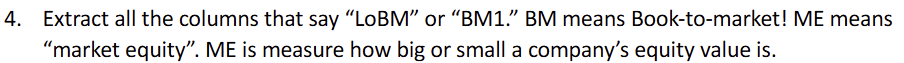

In [617]:
df = df.drop(columns="Date")

In [618]:
df = df.drop(columns=[
    "ME1_BM2", "ME1_BM3", "ME1_BM4", "ME1_BM5",
    "ME2_BM2", "ME2_BM3", "ME2_BM4", "ME2_BM5",
    "ME3_BM2", "ME3_BM3", "ME3_BM4", "ME3_BM5",
    "ME4_BM2", "ME4_BM3", "ME4_BM4", "ME4_BM5",
    "ME5_BM2", "ME5_BM3", "ME5_BM4", "ME5_BM5"])

In [619]:
df

,ME1_BM1,ME2_BM1,ME3_BM1,ME4_BM1,ME5_BM1
0,5.8275,1.2117,1.9071,1.5376,3.3248
1,-2.0205,2.3619,-0.9386,1.3857,1.0169
2,-4.829,-2.6848,-0.3405,1.6897,-1.295
3,-9.3633,-2.8013,-5.1925,-3.9136,-2.7381
4,5.5888,3.1022,1.911,3.4491,4.433
...,...,...,...,...,...
1183,-7.0665,-8.2831,-5.6927,-4.2825,-3.1108
1184,-13.9313,-8.357,-7.451,-6.6421,-7.6632
1185,0.8067,0.5968,-0.0448,-0.8765,1.4105
1186,10.8448,4.4605,4.9387,6.2576,7.8077


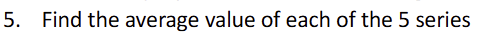

In [620]:
for i in range(len(df.columns)):
    df[df.columns[i]] = pd.to_numeric(df[df.columns[i]])

In [621]:
df = df/100

In [622]:
df_clean = df.copy()
df

,ME1_BM1,ME2_BM1,ME3_BM1,ME4_BM1,ME5_BM1
0,0.058275,0.012117,0.019071,0.015376,0.033248
1,-0.020205,0.023619,-0.009386,0.013857,0.010169
2,-0.048290,-0.026848,-0.003405,0.016897,-0.012950
3,-0.093633,-0.028013,-0.051925,-0.039136,-0.027381
4,0.055888,0.031022,0.019110,0.034491,0.044330
...,...,...,...,...,...
1183,-0.070665,-0.082831,-0.056927,-0.042825,-0.031108
1184,-0.139313,-0.083570,-0.074510,-0.066421,-0.076632
1185,0.008067,0.005968,-0.000448,-0.008765,0.014105
1186,0.108448,0.044605,0.049387,0.062576,0.078077


In [623]:
mean_list = []

for i in range(len(df.columns)):
    mean_list.append(df[df.columns[i]].mean())

In [624]:
mean_list

[np.float64(0.008314758417508419),
 np.float64(0.009071983164983165),
 np.float64(0.00980517845117845),
 np.float64(0.009968246632996633),
 np.float64(0.009574425925925925)]

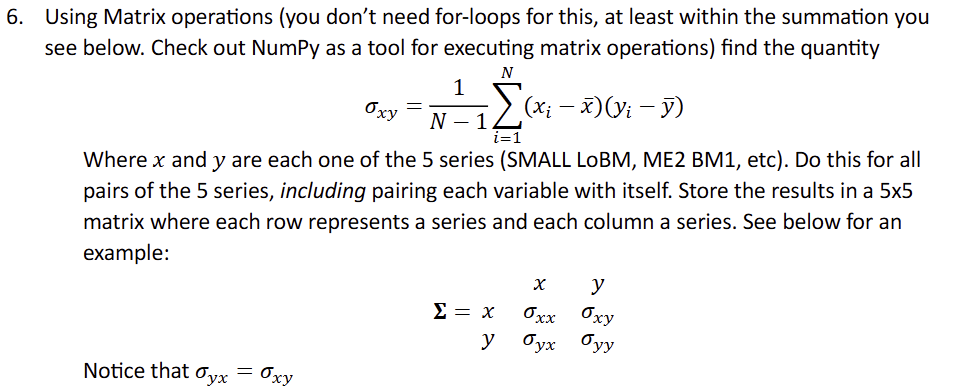

In [625]:
mean_list

[np.float64(0.008314758417508419),
 np.float64(0.009071983164983165),
 np.float64(0.00980517845117845),
 np.float64(0.009968246632996633),
 np.float64(0.009574425925925925)]

In [626]:
for i in range(len(mean_list)):
    df[df.columns[i]] = df[df.columns[i]] - mean_list[i]

In [627]:
df

,ME1_BM1,ME2_BM1,ME3_BM1,ME4_BM1,ME5_BM1
0,0.049960,0.003045,0.009266,0.005408,0.023674
1,-0.028520,0.014547,-0.019191,0.003889,0.000595
2,-0.056605,-0.035920,-0.013210,0.006929,-0.022524
3,-0.101948,-0.037085,-0.061730,-0.049104,-0.036955
4,0.047573,0.021950,0.009305,0.024523,0.034756
...,...,...,...,...,...
1183,-0.078980,-0.091903,-0.066732,-0.052793,-0.040682
1184,-0.147628,-0.092642,-0.084315,-0.076389,-0.086206
1185,-0.000248,-0.003104,-0.010253,-0.018733,0.004531
1186,0.100133,0.035533,0.039582,0.052608,0.068503


In [628]:
import numpy as np

# Extract the columns as a numpy array
X = df[df.columns].values

# Calculting n for the sample data
# n = X.shape[0]  # shape = [1188, 5]
n = len(df) # n = 1188

# Calculate covariance matrix: (X^T * X) / (n-1)
covariance_matrix = np.dot(X.T, X) / (n - 1)

covariance_df = pd.DataFrame(covariance_matrix,
                           index=df.columns, 
                           columns=df.columns)
print("Covariance Matrix:")
print(covariance_df) # The diagonals represent the variance, therefore the matix is symmetrical along the diagonal

Covariance Matrix:
          ME1_BM1   ME2_BM1   ME3_BM1   ME4_BM1   ME5_BM1
ME1_BM1  0.014181  0.007390  0.006724  0.005221  0.004058
ME2_BM1  0.007390  0.006327  0.005359  0.004356  0.003316
ME3_BM1  0.006724  0.005359  0.005384  0.004200  0.003314
ME4_BM1  0.005221  0.004356  0.004200  0.003822  0.002973
ME5_BM1  0.004058  0.003316  0.003314  0.002973  0.002841


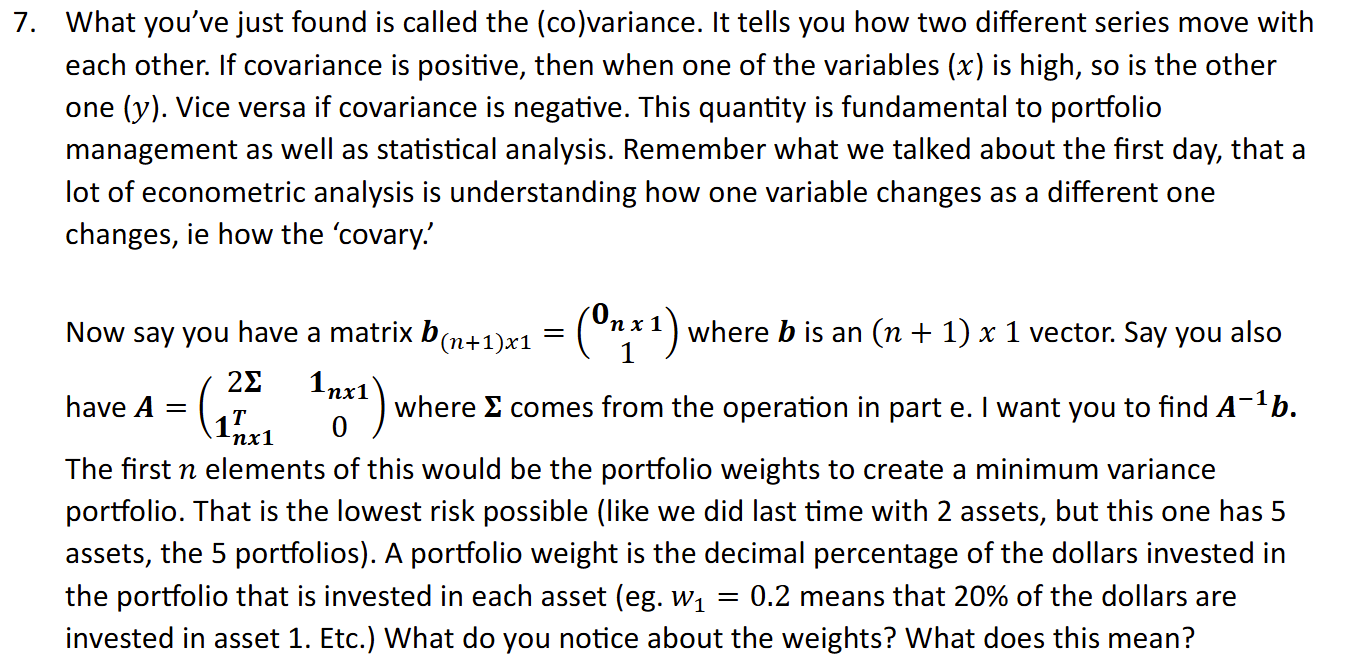

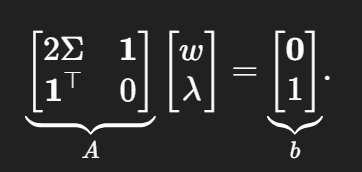

### We are aiming to find the weights of the portfolio, When we solve this matix equation (A_inverse * B). We get weights and lamda.

In [629]:
row, colm = covariance_df.shape


_2_sigma = 2 * covariance_df.values
_1_5x1 = np.ones((row, 1))
_1_5x1_Transpose = _1_5x1.T
zero_cell = np.array([[0.0]])

In [630]:
A = np.block([[_2_sigma, _1_5x1],
              [_1_5x1_Transpose, zero_cell]])

# Making A look Pretty
arr = list(covariance_df.columns)
arr.append("λ")
A_index = arr
A_cols = arr
A_df = pd.DataFrame(A, index=A_index, columns=A_cols)
print(A_df)

          ME1_BM1   ME2_BM1   ME3_BM1   ME4_BM1   ME5_BM1    λ
ME1_BM1  0.028362  0.014779  0.013449  0.010441  0.008117  1.0
ME2_BM1  0.014779  0.012655  0.010718  0.008712  0.006631  1.0
ME3_BM1  0.013449  0.010718  0.010769  0.008400  0.006628  1.0
ME4_BM1  0.010441  0.008712  0.008400  0.007644  0.005947  1.0
ME5_BM1  0.008117  0.006631  0.006628  0.005947  0.005683  1.0
λ        1.000000  1.000000  1.000000  1.000000  1.000000  0.0


In [631]:
B = np.zeros((row+1, 1))
B[-1, 0] = 1  # Set the last element (last element in first row -1, first coloumn 0) to 1

print(B)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [632]:
A_inverse = np.linalg.inv(A)

A_inverse_index = arr
A_inverse_cols = arr
A_inverse_df = pd.DataFrame(A_inverse, index=A_inverse_index, columns=A_inverse_cols)
print(A_inverse_df)

           ME1_BM1     ME2_BM1     ME3_BM1      ME4_BM1     ME5_BM1         λ
ME1_BM1  93.374989  -71.669449  -74.027983    34.516996   17.805448 -0.098440
ME2_BM1 -71.669449  600.608366 -360.110739  -279.380835  110.552657  0.018946
ME3_BM1 -74.027983 -360.110739  999.141270  -488.706872  -76.295676 -0.293485
ME4_BM1  34.516996 -279.380835 -488.706872  1517.062836 -783.492124  0.241918
ME5_BM1  17.805448  110.552657  -76.295676  -783.492124  731.429695  1.131061
λ        -0.098440    0.018946   -0.293485     0.241918    1.131061 -0.005247


In [633]:
wgt = np.dot(A_inverse, B)

arr2 = ["w1", "w2", "w3", "w4", "w5", "λ"]
weights_df = pd.DataFrame(wgt, index=arr2, columns=['Weights and λ'])
print(weights_df)

    Weights and λ
w1      -0.098440
w2       0.018946
w3      -0.293485
w4       0.241918
w5       1.131061
λ       -0.005247


### Two weights are negative → those portfolios are shorts used to hedge co-movement that raises total variance.

### One weight is > 1 and others are positive but smaller → the portfolio is levered long the most diversifying, lower-variance bucket, financed by the shorts.

### Weights sum to 1 → fully invested. Leverage comes from long > 100% and offsetting shorts.

### The pattern depends only on the covariance matrix, not expected returns. The optimizer loads the asset that reduces variance the most and shorts the ones that add variance given the correlations.

## The GMV solution concentrates in the large-cap bucket, funds it with shorts in the small and mid buckets, and achieves the lowest possible variance under the full-investment constraint.

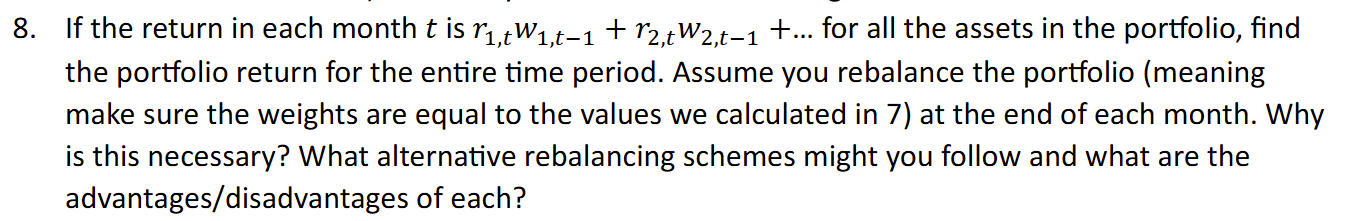

In [634]:
weights_df_clean = weights_df.drop(index="λ")

In [635]:
monthly_rebalanced_weighted_return = df_clean[df_clean.columns].dot(weights_df_clean.values)

compounding_monthly_r = 1 + monthly_rebalanced_weighted_return

# HPR is the entire holding period return -- 99 years or 1188 months
HPR = (compounding_monthly_r.values.prod()) - 1
print("HPR for 1188 months or 99 years: {}%".format(round(HPR*100, 4)))

# We have to annualise the HPR, we can use 12/1188 or 1/99
r_annual = np.pow((1+HPR), 12/1188) - 1
print("Annual rate of return over 1188 months or 99 years: {}%".format(round(r_annual*100, 4)))

HPR for 1188 months or 99 years: 2062974.0777%
Annual rate of return over 1188 months or 99 years: 10.5557%


In [636]:
# This is a df with all the portfolio returns, monthly

df_final = df_clean.copy()
df_final["Prot r monthly"] = monthly_rebalanced_weighted_return
print(df_final)

       ME1_BM1   ME2_BM1   ME3_BM1   ME4_BM1   ME5_BM1  Prot r monthly
0     0.058275  0.012117  0.019071  0.015376  0.033248        0.030221
1    -0.020205  0.023619 -0.009386  0.013857  0.010169        0.020045
2    -0.048290 -0.026848 -0.003405  0.016897 -0.012950       -0.005315
3    -0.093633 -0.028013 -0.051925 -0.039136 -0.027381       -0.016512
4     0.055888  0.031022  0.019110  0.034491  0.044330        0.047962
...        ...       ...       ...       ...       ...             ...
1183 -0.070665 -0.082831 -0.056927 -0.042825 -0.031108       -0.023451
1184 -0.139313 -0.083570 -0.074510 -0.066421 -0.076632       -0.068746
1185  0.008067  0.005968 -0.000448 -0.008765  0.014105        0.013284
1186  0.108448  0.044605  0.049387  0.062576  0.078077        0.079123
1187  0.137676  0.062285  0.038802  0.020351  0.055278        0.043685

[1188 rows x 6 columns]


# Why rebalance

Weights drift after each month, so the portfolio is no longer has minimum risk. Risk and leverage/shorts move away from target weights. Rebalancing pins weights back to target, keeping variance and exposures controlled.

Therefore, we reset to the GMV weights at each month-end and compute next month’s return with those weights.


# Alternatives — pros / cons

Buy-and-hold (no rebalance) -- Zero turnover/costs. Large drift; higher realized risk; unintended bets; leverage creep.

Calendar (monthly / quarterly / annual) -- Simple, predictable, auditable. Trades even when unnecessary (costs) or allows drift if too infrequent.

Threshold / bands (rebalance only if |minimum w − drifted w| exceeds threshold) -- Big turnover savings; good cost-risk trade-off. Some drift between trades; bands need tuning.

Rolling GMV (re-estimate Σ on a each month window) -- Adapts to covariance changes. Estimation noise; higher turnover and costly.

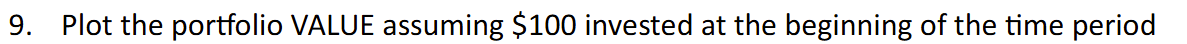

In [637]:
import matplotlib.pyplot as plt

portfolio_returns_monthly = df_final["Prot r monthly"].values

# Calculate cumulative growth of $100
# Method: $100 * (1 + r_month1) * (1 + r_month2) * (1 + r_month3) * ...
# Using numpy's cumprod (cumulative product)

growth_factors = 1 + portfolio_returns_monthly  # Convert returns to growth factors

portfolio_value_i = 100
values = []

for monthly_return in growth_factors:
    portfolio_value_i = portfolio_value_i * monthly_return  # Next month = previous * growth
    values.append(portfolio_value_i)

df_final_returns = df_final.copy()
df_final_returns["Growth of $100"] = values

# Way to display cleanly
sample = pd.concat([df_final_returns.head(5), df_final_returns.tail(5)])
display(sample.head(10).style.format({'Growth of $100': '{:,.2f}'}))

,ME1_BM1,ME2_BM1,ME3_BM1,ME4_BM1,ME5_BM1,Prot r monthly,Growth of $100
0,0.058275,0.012117,0.019071,0.015376,0.033248,0.030221,103.02
1,-0.020205,0.023619,-0.009386,0.013857,0.010169,0.020045,105.09
2,-0.048290,-0.026848,-0.003405,0.016897,-0.012950,-0.005315,104.53
3,-0.093633,-0.028013,-0.051925,-0.039136,-0.027381,-0.016512,102.80
4,0.055888,0.031022,0.019110,0.034491,0.044330,0.047962,107.73
1183,-0.070665,-0.082831,-0.056927,-0.042825,-0.031108,-0.023451,"1,941,220.22"
1184,-0.139313,-0.083570,-0.074510,-0.066421,-0.076632,-0.068746,"1,807,769.69"
1185,0.008067,0.005968,-0.000448,-0.008765,0.014105,0.013284,"1,831,783.43"
1186,0.108448,0.044605,0.049387,0.062576,0.078077,0.079123,"1,976,720.08"
1187,0.137676,0.062285,0.038802,0.020351,0.055278,0.043685,"2,063,074.08"


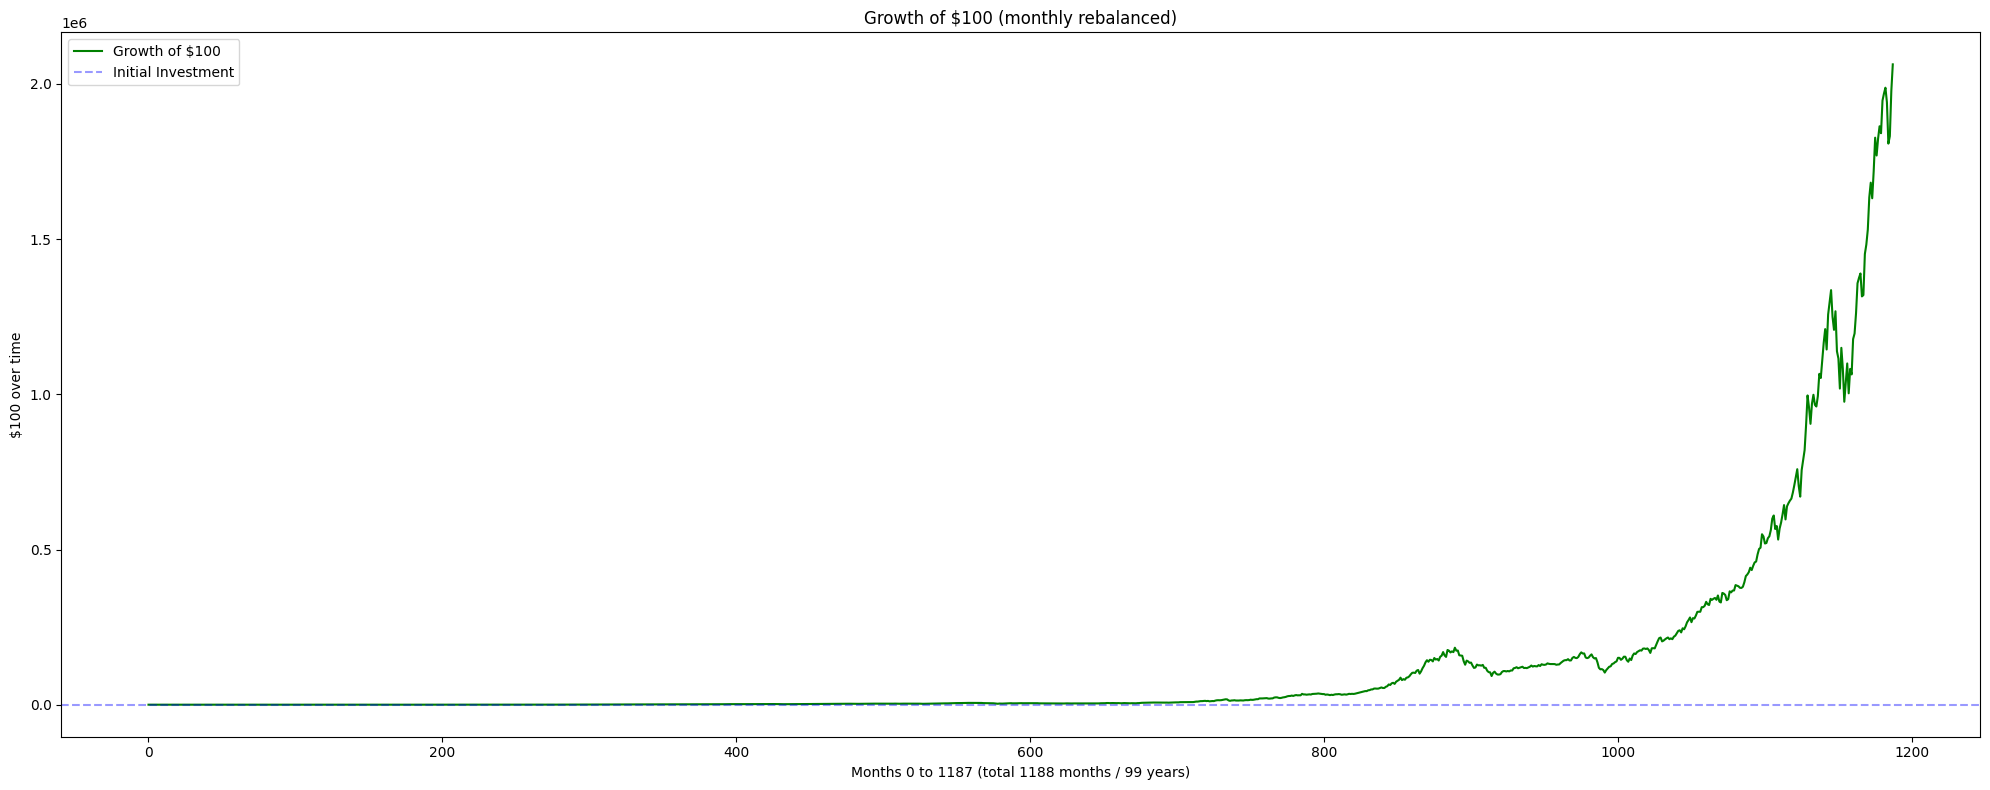

In [638]:
import matplotlib.pyplot as plt

# Column with the wealth path
series = df_final_returns["Growth of $100"]

# Linear scale
ax = series.plot(figsize=(20,8), color='green')
ax.axhline(y=100, color='b', linestyle='--', alpha=0.4, label='Initial Investment')
ax.set_xlabel('Months 0 to 1187 (total 1188 months / 99 years)')
ax.set_ylabel("$100 over time")
ax.set_title("Growth of $100 (monthly rebalanced)")
plt.tight_layout()
plt.legend()
plt.show()

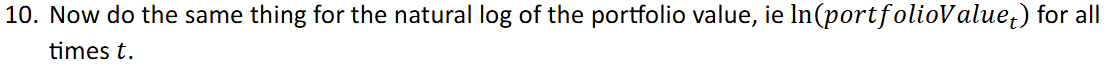

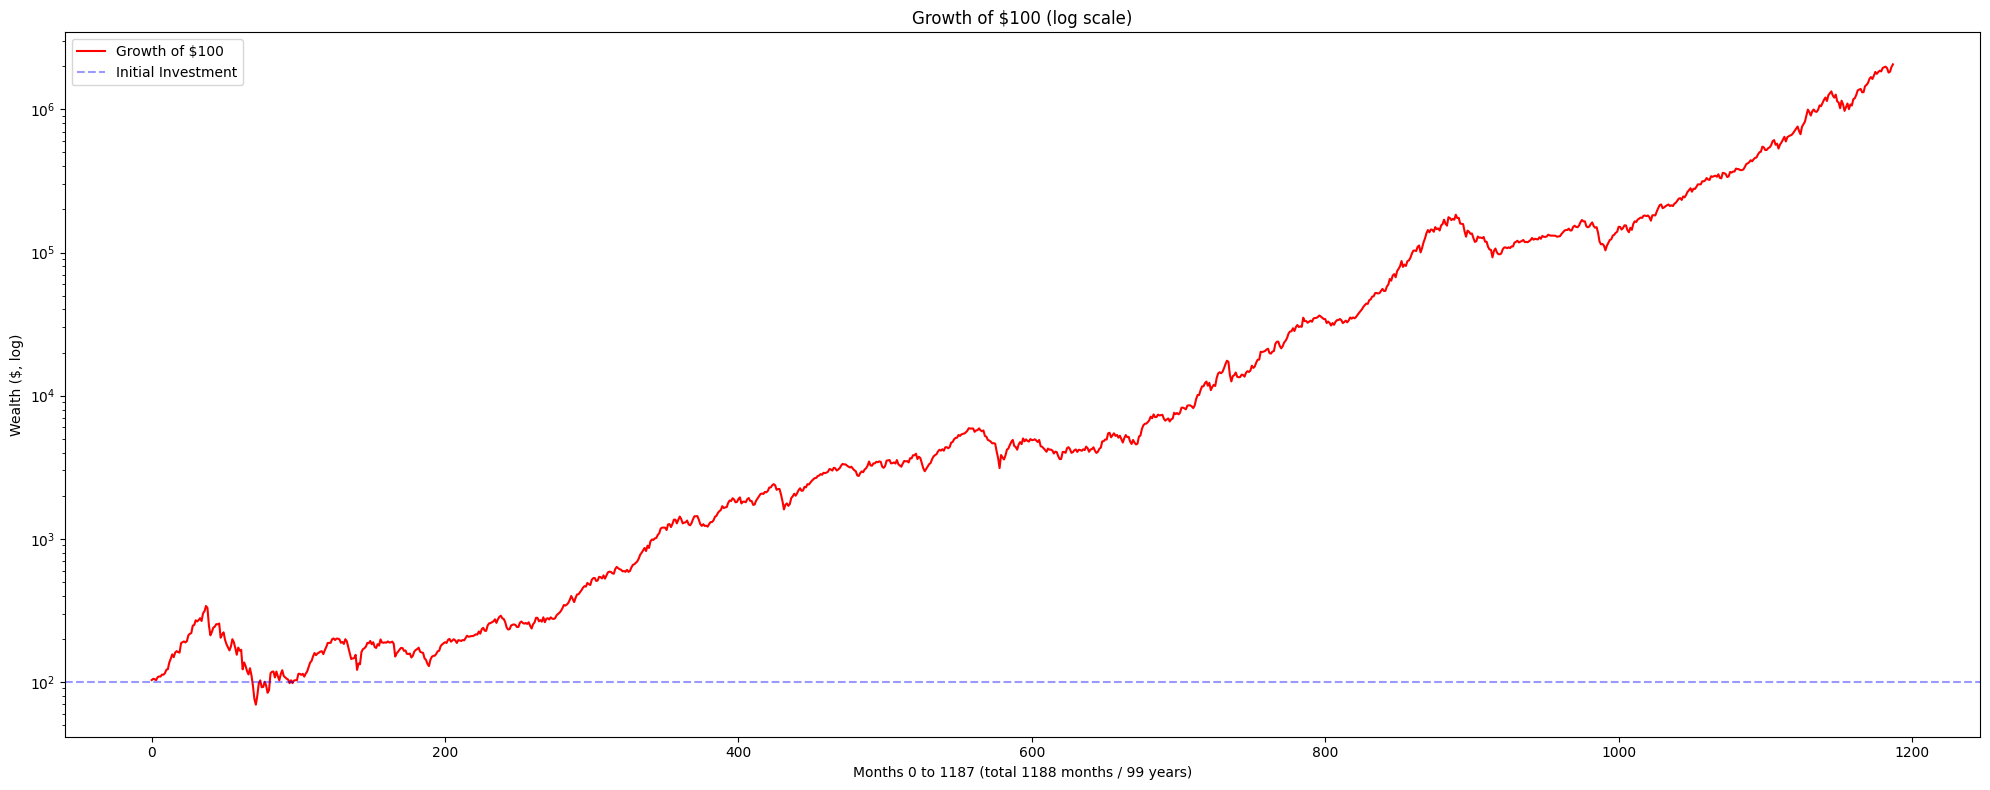

In [639]:
# Log scale (useful across 99 years)
ax = series.plot(figsize=(20,8), logy=True, color='red')
ax.axhline(y=100, color='b', linestyle='--', alpha=0.4, label='Initial Investment')
ax.set_xlabel('Months 0 to 1187 (total 1188 months / 99 years)')
ax.set_ylabel("Wealth ($, log)")
ax.set_title("Growth of $100 (log scale)")
plt.legend()
plt.tight_layout()
plt.show()